<a href="https://colab.research.google.com/github/Harshitsri170/DataPreprocessing-FeatureEngineering/blob/main/HousePricePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()  # Upload the kaggle.json file here


Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"harshit4141","key":"2f5887616a14c99e0bd66b6b56693dab"}'}

In [10]:
!mkdir -p ~/.kaggle
!cp "/content/kaggle (1) (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [12]:
!pip install -q kaggle
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip house-prices-advanced-regression-techniques.zip


  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 360MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [9]:
import os
print(os.listdir())


['.config', '.ipynb_checkpoints', 'kaggle (1) (1).json', 'sample_data']


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [18]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
train.head()

train['source'] = 'train'
test['source'] = 'test'
test['SalePrice'] = np.nan
data = pd.concat([train, test], ignore_index=True)

data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

(1460, 81)


In [19]:
train.info()
train.describe()
train.isnull().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageYrBlt,81
GarageFinish,81


In [23]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['HouseAge'] = data['YrSold'] - data['YearBuilt']

data = pd.get_dummies(data)


Text(0.5, 1.0, 'Correlation Matrix - All Numeric Features')

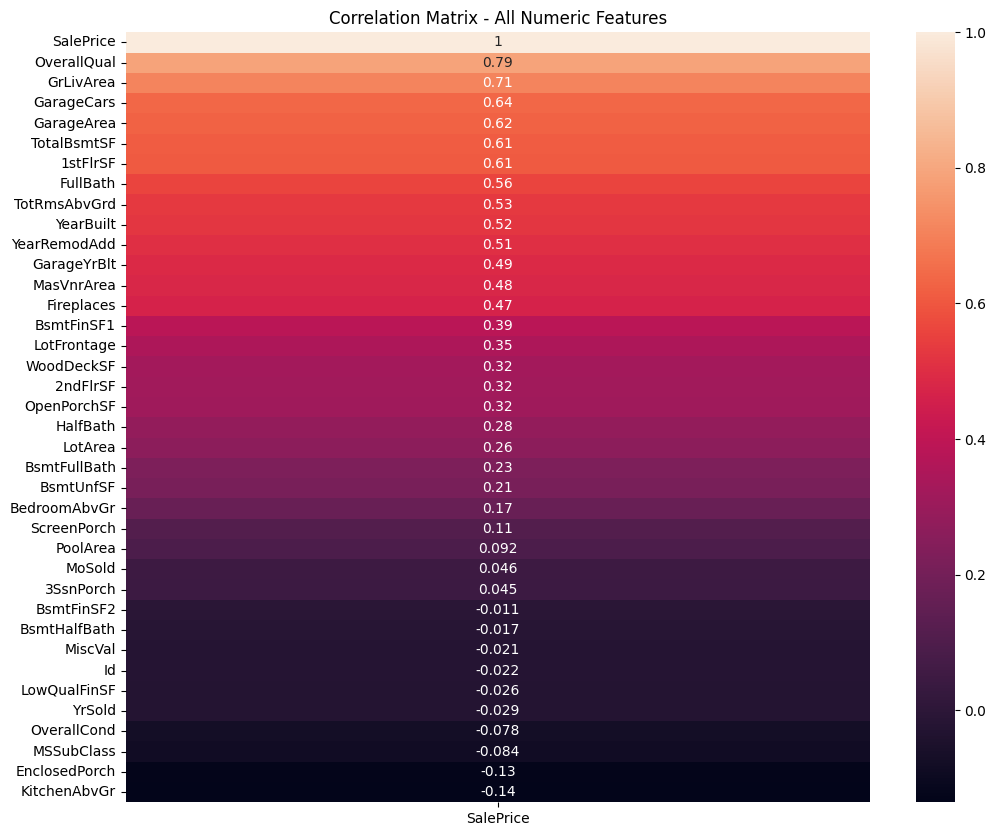

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_train = train.select_dtypes(include=['number'])
corr = numeric_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr['SalePrice'].sort_values(ascending=False).to_frame(), annot=True)
plt.title("Correlation Matrix - All Numeric Features")

In [24]:
scaler = StandardScaler()
scaled_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[scaled_cols] = scaler.fit_transform(data[scaled_cols])

train_processed = data[data['source_train'] == 1].drop(['source_train', 'source_test', 'Id'], axis=1)
test_processed = data[data['source_test'] == 1].drop(['source_train', 'source_test', 'SalePrice'], axis=1)

X = train_processed.drop('SalePrice', axis=1)
y = train_processed['SalePrice']

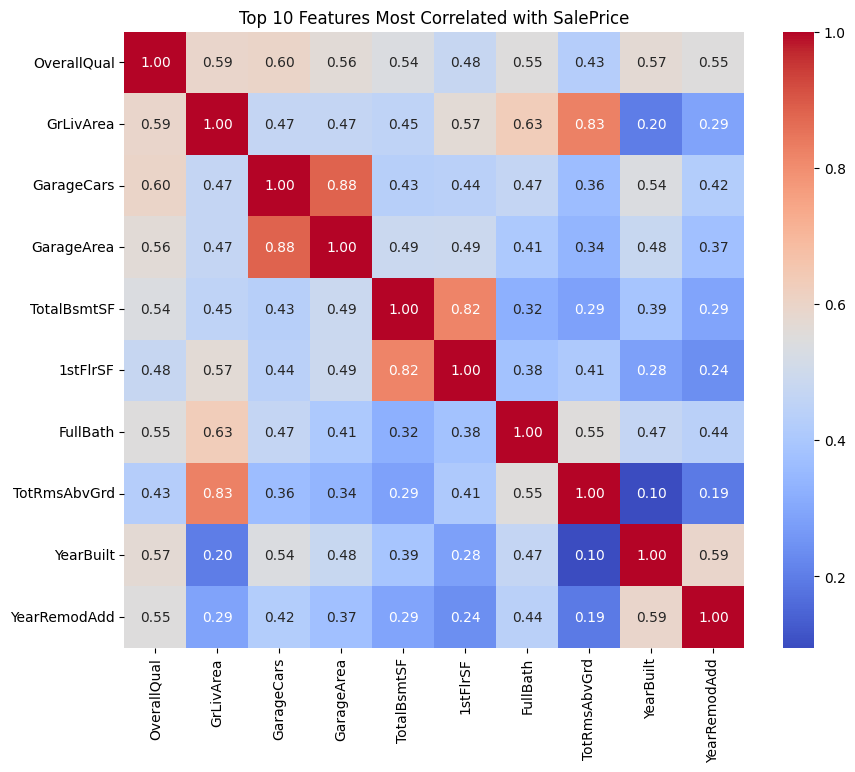

In [27]:
top = corr['SalePrice'].abs().sort_values(ascending=False)[1:11].index
plt.figure(figsize=(10, 8))
sns.heatmap(corr.loc[top, top], annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Top 10 Features Most Correlated with SalePrice")
plt.show()
